In [3]:
import numpy as np
import graph_tool.all as gt 


In [2]:
def apsp(G,weights=None):
    d = np.array( [v for v in gt.shortest_distance(G,weights=weights)] ,dtype=float)
    return d

In [3]:
G = gt.lattice((20,20))


In [4]:
A = gt.adjacency(G).toarray()


In [5]:
import scipy

In [6]:
L,Q = np.linalg.eigh(A)
Lp_old = sum(L ** p for p in range(1,10))

B_old = np.matmul(np.matmul(Q, np.diag(Lp_old)), Q.T)


print(f"L's shape is {L.shape} and Q's shape is {Q.shape}")

L's shape is (400,) and Q's shape is (400, 400)


In [7]:
A = gt.adjacency(G)
L,Q = np.linalg.eigh(A.toarray())
Lp = sum(L ** p for p in range(1,10))

B = np.matmul(np.matmul(Q, np.diag(Lp)), Q.T)



In [8]:
A = gt.adjacency(G).toarray()

In [9]:
Ap = sum(np.linalg.matrix_power(A,p) for p in range(1,10))

In [10]:
np.linalg.norm(Ap-B,ord='fro')

4.8714918702962774e-09

In [11]:
# X = np.random.rand(5,5)
# X = (X.T + X)/2 

# X.dtype

In [12]:
# L,Q = np.linalg.eig(X)
# B = np.matmul(np.matmul(Q, np.diag(L)), Q.T)

# print(np.linalg.norm(B-X,'fro'))

In [15]:
import os 
from modules.graph_io import write_edgelist
path = 'table_graphs/'
graph_paths = os.listdir(path)

# graph_paths = list( map(lambda s: s.split('.')[0], graph_paths) )
graphs = [(gt.load_graph(f"{path+graph}"),graph) for graph in graph_paths]

In [16]:
for G,path in graphs:
    fpath = f"table_txt_graphs/{path.split('.')[0]}.txt"
    write_edgelist(G,fpath)


In [1]:
from modules.graph_metrics import get_cluster_ids
import json

In [4]:
path = 'table_graphs/'
graph_paths = os.listdir(path)
graphs = [gt.load_graph(f"{path+graph}") for graph in graph_paths]

for i,G in enumerate(graphs):
    name = graph_paths[i].split(".")[0]
    ids, _ = get_cluster_ids(G,30)
    ids = [list(id) for id in ids]
    with open(f'cluster_ids/{name}.json', 'w') as f:
        json.dump(ids, f)
    f.close()
    


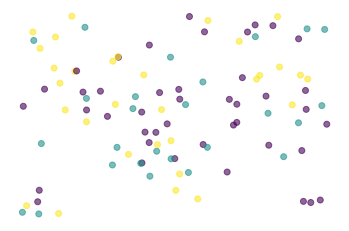

In [2]:
import numpy as np 
from modules.graph_io import plot_data 
import pylab as plt

X = np.random.uniform(0,1,size=(100,2))
y = np.random.randint(0,3,size=(100))

legend = ["red", "yellow", "green"]

fig, ax, scatter = plot_data(X,y)

In [ ]:
ax.sc
ax.legend()